<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [14]:
def sum_prod(X, V):
    '''
    X - матрицы(n, n)
    V - векторы(n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    p = len(X)
    n = X[0].shape[0]  # Размерность матриц и векторов

    # Создаем пустую матрицу с размерностью (n*p, n)
    new_matrix = np.zeros((n*p, n))

    # Заполняем преобразованную матрицу
    for i in range(p):
        new_matrix[i*n:(i+1)*n, :] = X[i] @ V[i]

    return new_matrix

# Тесты
def test_sum_prod():
    # Создаем тестовые данные
    n = 3  # Размерность матриц и векторов
    p = 2  # Количество матриц и векторов
    matrices = [np.random.rand(n, n) for _ in range(p)]
    vectors = [np.random.rand(n, 1) for _ in range(p)]

    # Вычисляем преобразованную матрицу
    new_matrix = sum_prod(matrices, vectors)

    # Проверяем размерность преобразованной матрицы
    assert new_matrix.shape == (n*p, n)

    # Проверяем, что сумма произведений матриц на векторы правильная
    expected_result = np.zeros((n*p, n))
    for i in range(p):
        expected_result[i*n:(i+1)*n, :] = matrices[i] @ vectors[i]
    np.testing.assert_array_almost_equal(new_matrix, expected_result)

    print("Все тесты пройдены успешно!")

if __name__ == "__main__":
    test_sum_prod()

[0.42385505 0.60639321 0.0191932 ]	[0.30157482 0.66017354 0.29007761]	[0.61801543 0.4287687  0.13547406]
[0.29828233 0.56996491 0.59087276]	[0.57432525 0.65320082 0.65210327]	[0.43141844 0.8965466  0.36756187] [array([[0.43586493],
       [0.89192336],
       [0.80619399]]), array([[0.70388858],
       [0.10022689],
       [0.91948261]])] Все тесты пройдены успешно!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [6]:
def binarize(M, threshold):
    return (M > threshold).astype(int)

# Тесты
def test_binarize_matrix():
    # Создаем тестовую матрицу
    matrix = np.array([[0.1, 0.5, 0.8],
                       [0.3, 0.9, 0.2],
                       [0.6, 0.4, 0.7]])

    # Устанавливаем порог
    threshold = 0.5

    # Бинаризуем матрицу
    new_matrix = binarize(matrix, threshold)

    # Ожидаемый результат
    expected_result = np.array([[0, 0, 1],
                                [0, 1, 0],
                                [1, 0, 1]])

    # Проверяем, что бинаризованная матрица совпадает с ожидаемым результатом
    np.testing.assert_array_equal(new_matrix, expected_result)

    print("Тест пройден успешно!")

if __name__ == "__main__":
    test_binarize_matrix()


Тест пройден успешно!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [11]:
def unique_rows(mat):
    unique_rows = [np.unique(row) for row in mat]
    return unique_rows

def unique_columns(mat):
    unique_cols = [np.unique(column) for column in mat.T]
    return unique_cols

# Тесты
def test_unique_elements_functions():
    # Создаем тестовую матрицу
    matrix = np.array([[1, 2, 3, 2],
                       [4, 5, 6, 4],
                       [7, 8, 9, 7]])

    # Ожидаемые уникальные элементы в строках
    expected_unique_rows = [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9])]

    # Ожидаемые уникальные элементы в столбцах
    expected_unique_cols = [np.array([1, 4, 7]), np.array([2, 5, 8]), np.array([3, 6, 9]), np.array([2, 4, 7])]

    # Проверяем, что функции возвращают ожидаемые результаты
    u_rows = unique_rows(matrix)
    u_cols = unique_columns(matrix)

    for i in range(len(matrix)):
        np.testing.assert_array_equal(u_rows[i], expected_unique_rows[i])

    for i in range(len(matrix.T)):
        np.testing.assert_array_equal(u_cols[i], expected_unique_cols[i])

    print("Тесты пройдены успешно!")

if __name__ == "__main__":
    test_unique_elements_functions()


Тесты пройдены успешно!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

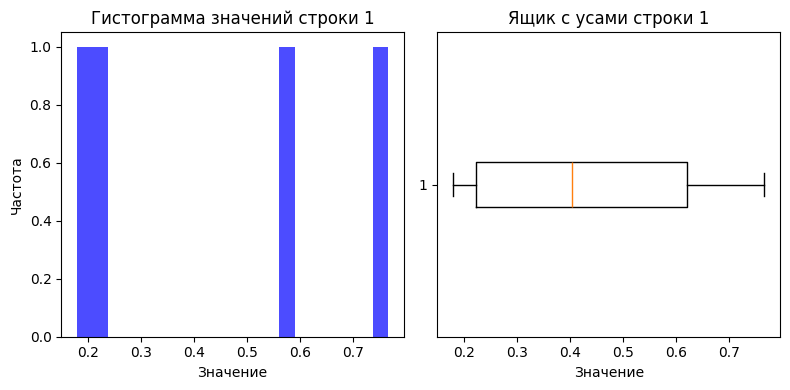

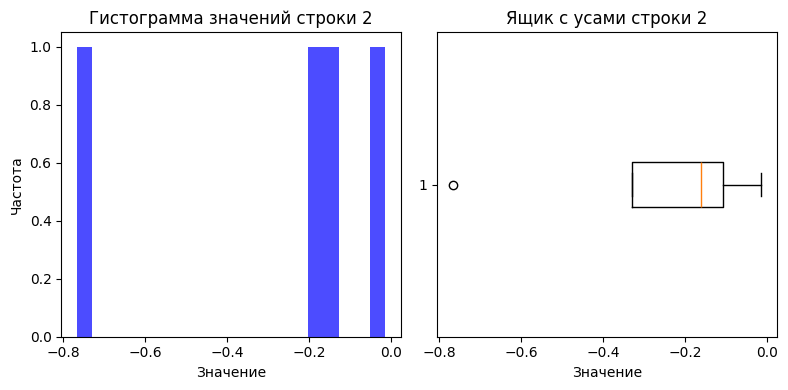

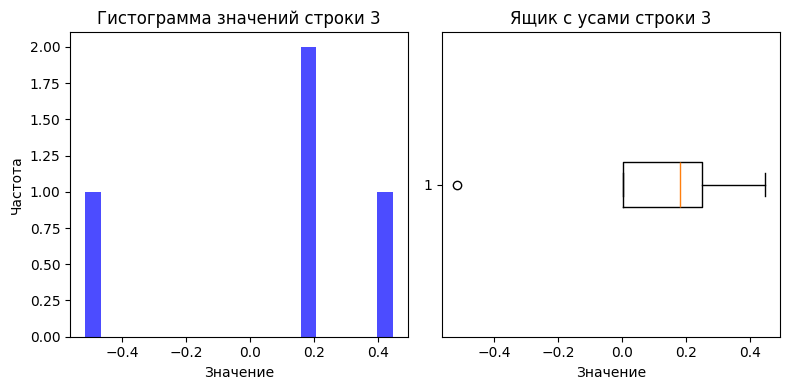

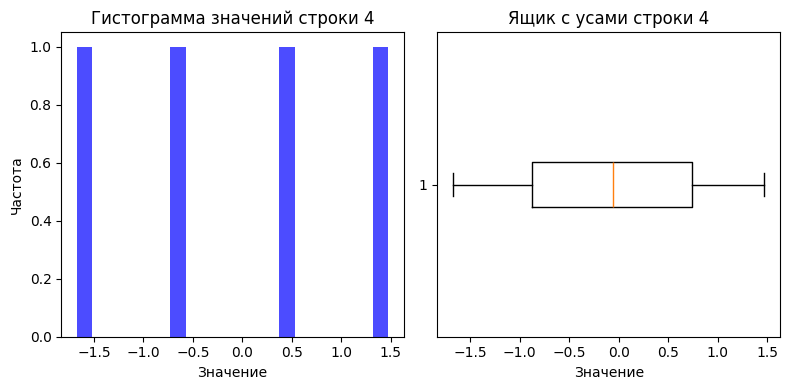

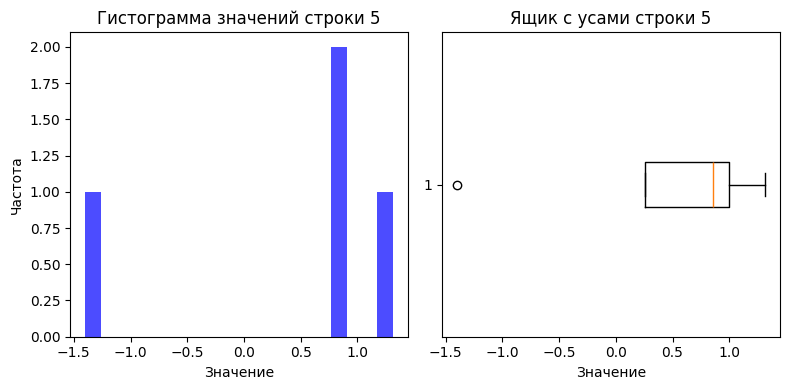

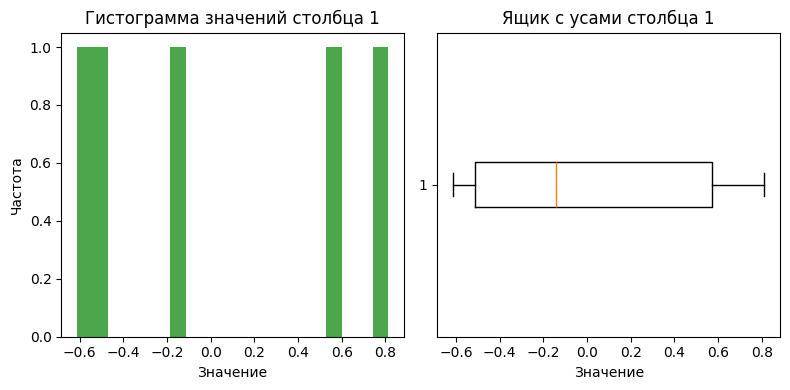

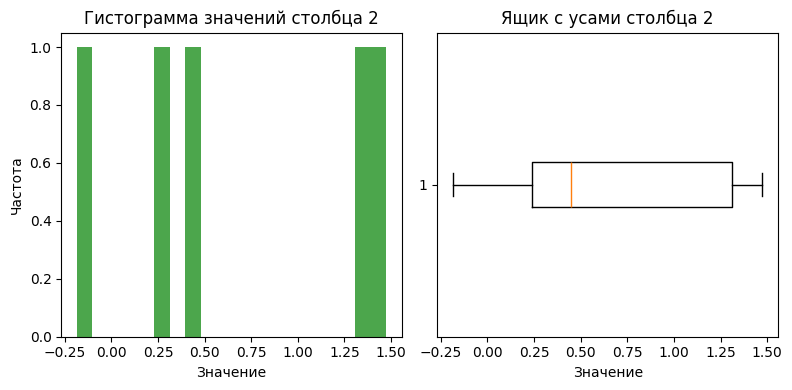

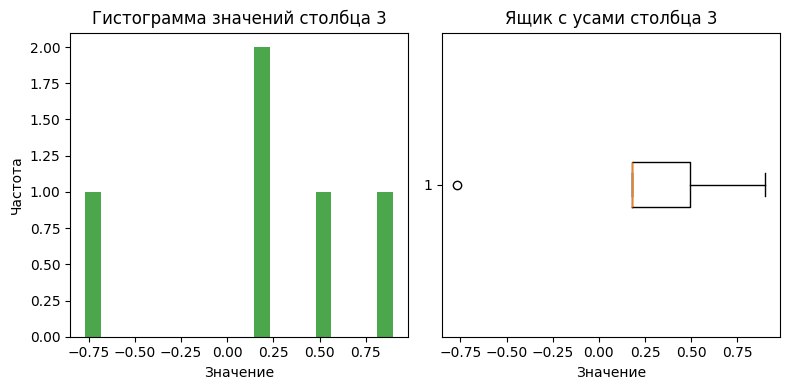

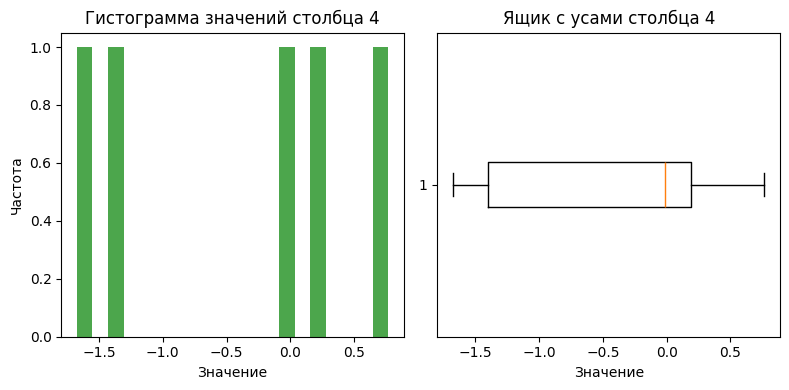

In [12]:
def generate_and_analyze_matrix(m, n):
    # Генерируем матрицу с случайными числами из нормального распределения
    matrix = np.random.randn(m, n)

    # Вычисляем математическое ожидание и дисперсию для каждой строки и столбца
    row_means = np.mean(matrix, axis=1)
    column_means = np.mean(matrix, axis=0)
    row_variances = np.var(matrix, axis=1)
    column_variances = np.var(matrix, axis=0)

    # Строим гистограммы значений для каждой строки
    for i in range(m):
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.hist(matrix[i], bins=20, color='blue', alpha=0.7)
        plt.title(f"Гистограмма значений строки {i+1}")
        plt.xlabel("Значение")
        plt.ylabel("Частота")

        plt.subplot(1, 2, 2)
        plt.boxplot(matrix[i], vert=False)
        plt.title(f"Ящик с усами строки {i+1}")
        plt.xlabel("Значение")

        plt.tight_layout()
        plt.show()

    # Строим гистограммы значений для каждого столбца
    for j in range(n):
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.hist(matrix[:, j], bins=20, color='green', alpha=0.7)
        plt.title(f"Гистограмма значений столбца {j+1}")
        plt.xlabel("Значение")
        plt.ylabel("Частота")

        plt.subplot(1, 2, 2)
        plt.boxplot(matrix[:, j], vert=False)
        plt.title(f"Ящик с усами столбца {j+1}")
        plt.xlabel("Значение")

        plt.tight_layout()
        plt.show()

    # Возвращаем матрицу, мат. ожидание и дисперсию для строк и столбцов
    return matrix, row_means, column_means, row_variances, column_variances

# Пример использования
m = 5  # Количество строк
n = 4  # Количество столбцов
matrix, row_means, column_means, row_variances, column_variances = generate_and_analyze_matrix(m, n)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [7]:
def chess(m, n, a, b):
    import numpy as np

def chess(m, n, a, b):
    matrix = np.empty((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

# Тесты
def test_chess():
    # Тест 1
    m1, n1 = 3, 4
    a1, b1 = 1, 0
    expected_result1 = np.array([[1, 0, 1, 0],
                                [0, 1, 0, 1],
                                [1, 0, 1, 0]])
    np.testing.assert_array_equal(chess(m1, n1, a1, b1), expected_result1)

    # Тест 2
    m2, n2 = 2, 2
    a2, b2 = 7, 3
    expected_result2 = np.array([[7, 3],
                                [3, 7]])
    np.testing.assert_array_equal(chess(m2, n2, a2, b2), expected_result2)

    print("Тесты пройдены успешно!")

if __name__ == "__main__":
    test_chess()


Тесты пройдены успешно!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

ValueError: RGBA values should be within 0-1 range

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Математическое ожидание: 0.059808015534485
Дисперсия: 1.0158266192149312
СКО: 1.0078822447165796
Локальные максимумы: [(3, 2.240893199201458), (6, 0.9500884175255894), (9, 0.41059850193837233), (11, 1.454273506962975), (14, 0.44386323274542566), (16, 1.4940790731576061), (18, 0.31306770165090136), (22, 0.8644361988595057), (24, 2.2697546239876076), (26, 0.04575851730144607), (28, 1.5327792143584575), (31, 0.37816251960217356), (36, 1.2302906807277207), (39, -0.30230275057533557), (43, 1.9507753952317897), (45, -0.4380743016111864), (47, 0.7774903558319101), (49, -0.2127402802139687), (51, 0.386902497859262), (55, 0.42833187053041766), (57, 0.3024718977397814), (59, -0.3627411659871381), (61, -0.3595531615405413), (64, 0.17742614225375283), (67, 0.4627822555257742), (70, 0.7290905621775369), (72, 1.1394006845433007), (74, 0.402341641177549), (79, 0.05616534222974544), (81, 0.9008264869541871), (85, 1.8958891760305832), (89, 1.0544517269311366), (91, 1.2224450703824274), (93, 0.976639036

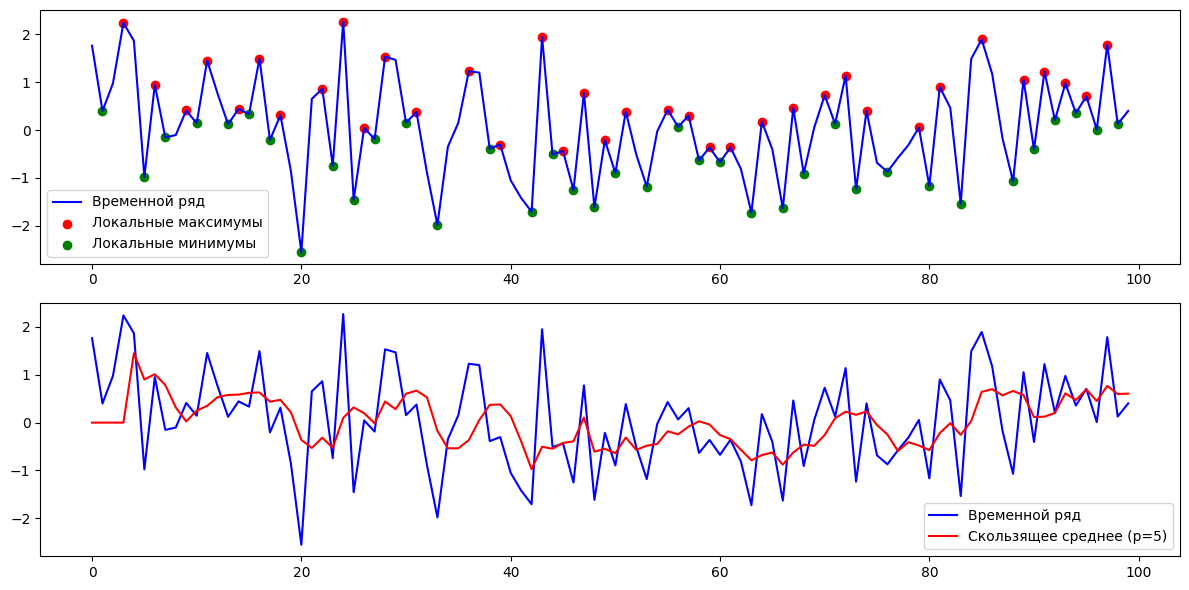

In [13]:

# Создаем случайный временной ряд для примера
np.random.seed(0)
time_series = np.random.randn(100)  # Пример временного ряда

# Вычисляем математическое ожидание и дисперсию
mean_value = np.mean(time_series)
variance = np.var(time_series)
std_deviation = np.sqrt(variance)

# Находим локальные максимумы и минимумы
local_maxima = []
local_minima = []

for i in range(1, len(time_series) - 1):
    if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
        local_maxima.append((i, time_series[i]))
    elif time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
        local_minima.append((i, time_series[i]))

# Вычисляем скользящее среднее с окном p
def moving_average(series, p):
    moving_avg = np.convolve(series, np.ones(p), mode='valid') / p
    return np.concatenate((np.zeros(p - 1), moving_avg), axis=0)

p = 5  # Размер окна скользящего среднего
smoothed_series = moving_average(time_series, p)

# Вывод результатов
print("Математическое ожидание:", mean_value)
print("Дисперсия:", variance)
print("СКО:", std_deviation)

print("Локальные максимумы:", local_maxima)
print("Локальные минимумы:", local_minima)

# Графики
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_series, label="Временной ряд", color='b')
plt.scatter(*zip(*local_maxima), color='r', label="Локальные максимумы", marker='o')
plt.scatter(*zip(*local_minima), color='g', label="Локальные минимумы", marker='o')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_series, label="Временной ряд", color='b')
plt.plot(smoothed_series, label=f"Скользящее среднее (p={p})", color='r')
plt.legend()

plt.tight_layout()
plt.show()


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [12]:
def one_hot_encoding(vector, num_classes):
    # Создаем матрицу из нулей с размерностью (количество элементов вектора, количество классов)
    encoded_matrix = np.zeros((len(vector), num_classes), dtype=int)
    
    # Проходим по каждому элементу вектора и устанавливаем соответствующий бит в 1
    for i in range(len(vector)):
        encoded_matrix[i, vector[i]] = 1
    
    return encoded_matrix

# Пример использования
vector = [0, 2, 3, 0]
num_classes = 4
one_hot_encoded = one_hot_encoding(vector, num_classes)
print(one_hot_encoded)


[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
